<a href="https://colab.research.google.com/github/qwertyz15/Analysis-of-the-social-dynamics-of-COVID-19/blob/main/sentiment_analysis_assia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Necessary libraries
import os 
# Set Directory path for Dataset for Assia
os.chdir("/content/drive/My Drive/Covid19-Newspaper-Topic-Modeling")

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Loading data
df = pd.read_csv('data_clean_en.csv')

In [ ]:
df.head(10)

,Text_en,Text_en_clean,data_words,data_ready
0,Highest number of Covid-19 deaths in a day. Ni...,highest number of covid deaths in a day ninete...,"['highest', 'number', 'covid', 'death', 'day',...","['high', 'number', 'death', 'day', 'people', '..."
1,"Thrown out of job, Tangail’s chamcham makers p...",thrown out of job tangails chamcham makers pas...,"['thrown', 'job', 'tangails', 'chamcham', 'mak...","['throw', 'job', 'tangail', 'maker', 'hard', '..."
2,Coping with Covid-19 Shutdown: 200 families re...,coping with covid shutdown families reaping b...,"['coping', 'covid', 'shutdown', 'family', 'rea...","['cope', 'covid', 'shutdown', 'family', 'reapi..."
3,"7 family members, 4 police personnel test posi...",family members police personnel test positiv...,"['family', 'member', 'police', 'personnel', 't...","['family', 'member', 'test', 'positive', 'bogu..."
4,Coronavirus: Health ministry issues 13 directi...,coronavirus health ministry issues directives...,"['coronavirus', 'health', 'ministry', 'issue',...","['issue', 'official', 'effort', 'contain', 'to..."
5,Hasina Mohiuddin tests positive for Covid-19. ...,hasina mohiuddin tests positive for covid hasi...,"['hasina', 'mohiuddin', 'test', 'positive', 'c...","['test', 'positive', 'wife', 'late', 'former',..."
6,Bangabazar market shut for not ensuring Covid-...,bangabazar market shut for not ensuring covid ...,"['bangabazar', 'market', 'shut', 'ensuring', '...","['bangabazar', 'market', 'shut', 'ensure', 'co..."
7,"Coronavirus outbreak: Japan provides 2,000 PPE...",coronavirus outbreak japan provides ppes to b...,"['coronavirus', 'outbreak', 'japan', 'provides...","['provide', 'ppe', 'hand', 'set', 'high', 'qua..."
8,Gazipur city executive engineer found dead. Ga...,gazipur city executive engineer found dead gaz...,"['gazipur', 'city', 'executive', 'engineer', '...","['engineer', 'find', 'dead', 'gazipur', 'execu..."
9,10 of a family test Covid-19 positive in Chatt...,of a family test covid positive in chattogram...,"['family', 'test', 'covid', 'positive', 'chatt...","['family', 'test', 'covid', 'positive', 'membe..."


In [ ]:
def getSubjectivity(text):
  text = str(text)
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  text = str(text)
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['data_ready'].apply(getSubjectivity)
df['Polarity'] = df['data_ready'].apply(getPolarity)


In [ ]:
df

,Text_en,Text_en_clean,data_words,data_ready,Subjectivity,Polarity
0,Highest number of Covid-19 deaths in a day. Ni...,highest number of covid deaths in a day ninete...,"['highest', 'number', 'covid', 'death', 'day',...","['high', 'number', 'death', 'day', 'people', '...",0.502471,0.062098
1,"Thrown out of job, Tangail’s chamcham makers p...",thrown out of job tangails chamcham makers pas...,"['thrown', 'job', 'tangails', 'chamcham', 'mak...","['throw', 'job', 'tangail', 'maker', 'hard', '...",0.445607,0.010945
2,Coping with Covid-19 Shutdown: 200 families re...,coping with covid shutdown families reaping b...,"['coping', 'covid', 'shutdown', 'family', 'rea...","['cope', 'covid', 'shutdown', 'family', 'reapi...",0.500805,0.113480
3,"7 family members, 4 police personnel test posi...",family members police personnel test positiv...,"['family', 'member', 'police', 'personnel', 't...","['family', 'member', 'test', 'positive', 'bogu...",0.533182,0.060909
4,Coronavirus: Health ministry issues 13 directi...,coronavirus health ministry issues directives...,"['coronavirus', 'health', 'ministry', 'issue',...","['issue', 'official', 'effort', 'contain', 'to...",0.183333,0.050000
...,...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,the number of victims and deaths is increasing...,"['number', 'victim', 'death', 'increasing', 'l...","['number', 'victim', 'death']",0.050000,-0.075000
15561,India returns passengers in fear of coronaviru...,india returns passengers in fear of coronaviru...,"['india', 'return', 'passenger', 'fear', 'coro...","['passenger', 'fear']",0.000000,0.000000
15562,Instructions to bring back the Bangladeshis tr...,instructions to bring back the bangladeshis tr...,"['instruction', 'bring', 'back', 'bangladeshi'...","['instruction', 'trap', 'direct', 'strand', 'r...",0.414050,-0.016116
15563,Coronavirus: Control room opened in the Depart...,coronavirus control room opened in the departm...,"['coronavirus', 'control', 'room', 'opened', '...","['open', 'department', 'health']",0.500000,0.000000


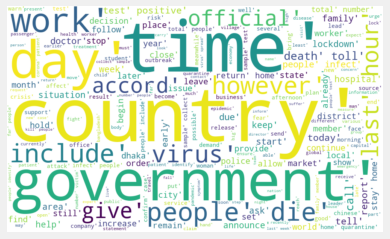

In [ ]:
allWords = ' '.join([str(text) for text in df['data_ready']])
wordCloud = WordCloud(width=1000,height=600,background_color='white',random_state=0,).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

In [ ]:
# Highest number of Covid-19 deaths in a day... we get positive polarity 
df.iloc[3,0]

'7 family members, 4 police personnel test positive for Covid-19 in Bogura. At least eleven people tested positive for coronavirus in Bogura today. Of the 11, seven are members of one family, while four others are police personnel.\n\nThe family had returned from Dhaka on April 8 and most likely came in close contact with a Covid-19 patient who passed away recently, Mostafizur Rahman, deputy civil surgeon of Bogura, said.\n\nA total of 188 samples were tested at the lab of Bogura Shaheed Ziaur Rahman Medical College (SZMC), reports our local correspondent quoting the deputy civil surgeon.\n\nSince April 1, a total of 52 people in Bogura tested positive for coronavirus. Of them, nine recovered and seven are being treated at Mohammad Ali Hospital (which is dedicated for Covid-19 patients).\n\nThe rest of the patients are in isolation in their homes as they are not showing any symptoms, but had still tested positive.'

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


Naive Bayes Analyser

In [ ]:
def getSentimentNB(text):
  text = str(text)
  sentiment = TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment
  sentiment_pos = sentiment.p_pos
  sentiment_neg = sentiment.p_neg
  if sentiment.p_pos > sentiment.p_neg :
    return 1
  elif sentiment.p_pos < sentiment.p_neg :
    return -1
  else:
    return 0

In [ ]:
test = df.iloc[0,0]
test

'Highest number of Covid-19 deaths in a day. Nineteen people -- the highest number in 24 hours so far -- have died with coronavirus infections since yesterday, the Directorate General of Health Services (DGHS) said today.\n\nThe death toll now stands at 269, said Prof Dr Nasima Sultana, additional director general (administration) of DGHS, during a briefing.\n\nOne thousand one hundred and sixty-two people have tested positive for Covid-19 in the last 24 hours. This is also the highest in the span of 24 hours so far.\n\nWith this, the total number of infected has reached 17822.\n\nA total of 7,900 samples were tested in 41 labs across the country since yesterday, Dr Nasima added.\n\nMeanwhile, 214 Covid-19 patients have recovered around the country in the last 24 hours. The total recovery number stands at 3,361, the DGHS official said.\n\nAmong the deceased, seven were female, Dr Nasima said adding that one of them was a child, aged under 10. Of the others, one was 31-40 years old, sev

In [ ]:
sentiment_test = getSentimentNB(test)
sentiment = TextBlob(test, analyzer=NaiveBayesAnalyzer()).sentiment
print(sentiment, sentiment_test)

Sentiment(classification='pos', p_pos=0.9999825915438771, p_neg=1.7408456115017016e-05) 1


In [ ]:
test1 = df.iloc[3,0]
test1

'7 family members, 4 police personnel test positive for Covid-19 in Bogura. At least eleven people tested positive for coronavirus in Bogura today. Of the 11, seven are members of one family, while four others are police personnel.\n\nThe family had returned from Dhaka on April 8 and most likely came in close contact with a Covid-19 patient who passed away recently, Mostafizur Rahman, deputy civil surgeon of Bogura, said.\n\nA total of 188 samples were tested at the lab of Bogura Shaheed Ziaur Rahman Medical College (SZMC), reports our local correspondent quoting the deputy civil surgeon.\n\nSince April 1, a total of 52 people in Bogura tested positive for coronavirus. Of them, nine recovered and seven are being treated at Mohammad Ali Hospital (which is dedicated for Covid-19 patients).\n\nThe rest of the patients are in isolation in their homes as they are not showing any symptoms, but had still tested positive.'

In [ ]:
sentiment_test = getSentimentNB(test1)
sentiment = TextBlob(test1, analyzer=NaiveBayesAnalyzer()).sentiment
print(sentiment, sentiment_test)

Sentiment(classification='pos', p_pos=0.9999713181851164, p_neg=2.8681814895036366e-05) 1


In [ ]:
# Remove word 'positive' 
test1_positive_out = test1.replace('positive', '')
test1_positive_out

"['family', 'member', 'police', 'personnel', 'test', '', 'covid', 'bogura', 'least', 'eleven', 'people', 'tested', '', 'coronavirus', 'bogura', 'today', 'seven', 'member', 'one', 'family', 'four', 'others', 'police', 'personnelthe', 'family', 'returned', 'dhaka', 'april', 'likely', 'came', 'close', 'contact', 'covid', 'patient', 'passed', 'away', 'recently', 'mostafizur', 'rahman', 'deputy', 'civil', 'surgeon', 'bogura', 'saida', 'total', 'sample', 'tested', 'lab', 'bogura', 'shaheed', 'ziaur', 'rahman', 'medical', 'college', 'szmc', 'report', 'local', 'correspondent', 'quoting', 'deputy', 'civil', 'surgeonsince', 'april', 'total', 'people', 'bogura', 'tested', '', 'coronavirus', 'nine', 'recovered', 'seven', 'treated', 'mohammad', 'ali', 'hospital', 'dedicated', 'covid', 'patientsthe', 'rest', 'patient', 'isolation', 'home', 'showing', 'symptom', 'still', 'tested', '']"

In [ ]:
sentiment_test = getSentimentNB(test1_positive_out)
sentiment = TextBlob(test1_positive_out, analyzer=NaiveBayesAnalyzer()).sentiment
print(sentiment, sentiment_test)

Sentiment(classification='pos', p_pos=0.5, p_neg=0.5) 0


In [ ]:
test_pos_out_covid_virus = test1_positive_out.replace('covid', 'virus')
test_pos_out_covid_virus

"['family', 'member', 'test', '', 'bogura', 'least', 'people', 'test', '', 'today', 'member', 'family', 'police', 'family', 'return', 'likely', 'close', 'contact', 'virus', 'patient', 'recently', 'deputy', 'total', 'sample', 'test', 'lab', 'report', 'local', 'deputy', 'civil', 'surgeonsince', 'total', 'people', 'test', '', 'recover', 'treat', 'hospital', 'dedicate', 'virus', 'patientsthe', 'rest', 'patient', 'isolation', 'home', 'show', 'symptom', 'still', 'test', '']"

In [ ]:
sentiment_test = getSentimentNB(test_pos_out_covid_virus)
sentiment = TextBlob(test_pos_out_covid_virus, analyzer=NaiveBayesAnalyzer()).sentiment
print(sentiment, sentiment_test)

Sentiment(classification='pos', p_pos=0.5, p_neg=0.5) 0


In [ ]:
test3 = df.iloc[15560,0]
test3

'The number of victims and deaths is increasing by leaps and bounds.                                                                                                                                                                                                                                                                                                                                                                                                                                       '

In [ ]:
sentiment_test = getSentimentNB(test3)
sentiment = TextBlob(test3, analyzer=NaiveBayesAnalyzer()).sentiment
print(sentiment, sentiment_test)

Sentiment(classification='pos', p_pos=0.7331060866158612, p_neg=0.26689391338413765) 1


NLTK Analyser vader_lexicon

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
test3 = df.iloc[15560,0]
test3

'The number of victims and deaths is increasing by leaps and bounds.                                                                                                                                                                                                                                                                                                                                                                                                                                       '

In [ ]:
sia = SIA()
sia.polarity_scores(test3)

{'compound': -0.25, 'neg': 0.169, 'neu': 0.735, 'pos': 0.096}

In [ ]:
test = df.iloc[0,0]
test

'Highest number of Covid-19 deaths in a day. Nineteen people -- the highest number in 24 hours so far -- have died with coronavirus infections since yesterday, the Directorate General of Health Services (DGHS) said today.\n\nThe death toll now stands at 269, said Prof Dr Nasima Sultana, additional director general (administration) of DGHS, during a briefing.\n\nOne thousand one hundred and sixty-two people have tested positive for Covid-19 in the last 24 hours. This is also the highest in the span of 24 hours so far.\n\nWith this, the total number of infected has reached 17822.\n\nA total of 7,900 samples were tested in 41 labs across the country since yesterday, Dr Nasima added.\n\nMeanwhile, 214 Covid-19 patients have recovered around the country in the last 24 hours. The total recovery number stands at 3,361, the DGHS official said.\n\nAmong the deceased, seven were female, Dr Nasima said adding that one of them was a child, aged under 10. Of the others, one was 31-40 years old, sev

In [ ]:
sia.polarity_scores(test)

{'compound': -0.802, 'neg': 0.056, 'neu': 0.902, 'pos': 0.043}

Comparison chart

In [ ]:
df_sample = df.sample(n=20, random_state=2)
df_sample

,Text_en,Text_en_clean,data_words,data_ready
3320,"220 Australians leave Dhaka, 157 Bangladeshis ...",australians leave dhaka bangladeshis return ...,"['australian', 'leave', 'dhaka', 'bangladeshi'...","['leave', 'total', 'australian', 'citizen', 'f..."
12858,The Prime Minister asked to run the campaign w...,the prime minister asked to run the campaign w...,"['prime', 'minister', 'asked', 'campaign', 'ce...","['ask', 'campaign', 'celebrity', 'advise', 'cr..."
8803,"In one day, 3,239 lives were lost due to the c...",in one day lives were lost due to the coronat...,"['one', 'day', 'life', 'lost', 'due', 'coronat...","['day', 'life', 'lose', 'due', 'coronation', '..."
14066,Two youths died in Barisal 6 hours apart. ...,two youths died in barisal hours apart ...,"['two', 'youth', 'died', 'barisal', 'hour', 'a...","['youth', 'die', 'hour', 'apart']"
10953,3 more people of Gafargaon Health Complex are ...,more people of gafargaon health complex are a...,"['people', 'gafargaon', 'health', 'complex', '...","['people', 'gafargaon', 'complex', 'affect']"
3713,Saudi relaxes virus lockdown except in hotspot...,saudi relaxes virus lockdown except in hotspot...,"['saudi', 'relaxes', 'virus', 'lockdown', 'exc...","['saudi', 'relax', 'virus', 'lockdown', 'parti..."
773,741 police personnel infected with Covid-19. T...,police personnel infected with covid the numb...,"['police', 'personnel', 'infected', 'covid', '...","['infect', 'covid', 'number', 'infect', 'count..."
4351,China returnee student referred to Dhaka. A Ba...,china returnee student referred to dhaka a ban...,"['china', 'returnee', 'student', 'referred', '...","['student', 'refer', 'student', 'admit', 'hosp..."
7459,The Bangladeshi student bought the Corona kit ...,the bangladeshi student bought the corona kit ...,"['bangladeshi', 'student', 'bought', 'corona',...","['student', 'buy', 'kit', 'send', 'country', '..."
9145,The US-Canada border was closed due to the Cor...,the uscanada border was closed due to the coro...,"['uscanada', 'border', 'closed', 'due', 'coron...","['close', 'due', 'corona', 'effect']"


In [ ]:
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

blobber = Blobber(analyzer=NaiveBayesAnalyzer())

def get_scores(content):
    blob = TextBlob(content)
    nb_blob = blobber(content)
    sia_scores = sia.polarity_scores(content)
    
    return pd.Series({
        'Text_en_clean': content,
        'textblob': blob.sentiment.polarity,
        'textblob_bayes': nb_blob.sentiment.p_pos - nb_blob.sentiment.p_neg,
        'nltk': sia_scores['compound'],
    })


In [ ]:
scores = df_sample.Text_en_clean.apply(get_scores)
scores.style.background_gradient(cmap='RdYlGn', axis=None, low=0.4, high=0.4)

,Text_en_clean,textblob,textblob_bayes,nltk
3320,australians leave dhaka bangladeshis return home a total of bangladeshi citizens return to the country while australian citizens and their families left dhaka for melbourne early saturdaya total of bangladeshi citizens who were stranded in australia due to the ban on international flights amid coronavirus outbreak returned home from melbourne early saturdaythe special sri lankan airlines flight landed at hazrat shahjalal international airport at about am on saturday after a stopover at colombothe high commission for bangladesh in canberra facilitated the return with support from authorities of bangladesh and australia and with active cooperation from the victorian bangladeshi community foundation and melton travel centre who were assigned to coordinate with intending passengers and manage funds and ticketing tasks said the ministry of foreign affairsinitially at its needs assessment template on its website the high commission received requests of bangladesh origin persons in australia who expressed willingness to return to bangladeshbased on this estimate of plus stranded bangladeshis seeking to return the high commission secured in principle approval of bangladesh authorities to accept special nonscheduled flight from australia and tried to charter a flight from sydney to dhakadrastic reduction in demand from the stranded bangladeshis compelled the high commission to charter sri lankan airlines to operate this flight from melbourneall passengers were notified to carry uptodate covid symptomfree or covid negative certificate issued within three days before departurebangladesh high commission thanked victorian bangladeshi community foundation melton travel centre bangladesh consulate general in sydney as well as sri lankan airlines for operationalising this nonscheduled flightin a separate incident a nonscheduled sri lanka airlines flight from dhaka to melbourne left with australian citizens and their families early saturdaytogether with passengers who departed from hazrat shahjalal international airport on april over have so far returned home to australia said the australian high commission in dhakathe high commission said that they for the second time in three weeks helped australian citizens permanent residents and their immediate families to return to australiaaustralian high commissioner to bangladesh jeremy bruer was present at the airport to see them offa number of high commission staff were also there to ensure the process went smoothly,0.068263,1.000000,0.954500
12858,the prime minister asked to run the campaign with celebrities and imams prime minister sheikh hasina has advised not to create panic over corona he urged more emphasis on publicity the prime minister made the remarks at a meeting of the national economic council nec here on thursday planning minister ma mannan briefed reporters after the nec meeting held at the planning commission he said the prime minister had said that panic could not be created with corona he also directed the ministry of information to increase publicity the prime minister asked the star celebrity to take initiative with the imams of the mosques he also directed the delivery of coronavirus testing equipment at the departmental level there is no doubt that the overall economy will suffer such could have an impact on national income asked whether there would be a lockdown like in other countries the planning minister said the time has not come for a lockdown the people of this country are not accustomed to it not lockdown the government will gradually move towards strict measures we have to hope for the best and be prepared for the worst it is learned that the corona situation was discussed at the beginning of the nec meeting the protection of the people is emphasized there if there is any goal quarantine is suggested on its own initiative in todays nec meeting the revised annual development program adp was passed in the current financial

Apply NLTK SIA to whole dataframe 

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
def getcompound(text):
  scores = sia.polarity_scores(str(text))
  return scores['compound']

In [ ]:
scores = getcompound("This restaurant was great, but I'm not sure if I'll go there again.")
print(scores)

0.0276


In [ ]:
scores = sia.polarity_scores("This restaurant was great, but I'm not sure if I'll go there again.")

In [ ]:
print(scores['compound'])

0.0276


In [ ]:
df['Compound'] = df['Text_en_clean'].apply(getcompound)

In [ ]:
df

,Text_en,Text_en_clean,data_words,data_ready,Compound
0,Highest number of Covid-19 deaths in a day. Ni...,highest number of covid deaths in a day ninete...,"['highest', 'number', 'covid', 'death', 'day',...","['high', 'number', 'death', 'day', 'people', '...",-0.8158
1,"Thrown out of job, Tangail’s chamcham makers p...",thrown out of job tangails chamcham makers pas...,"['thrown', 'job', 'tangails', 'chamcham', 'mak...","['throw', 'job', 'tangail', 'maker', 'hard', '...",0.6688
2,Coping with Covid-19 Shutdown: 200 families re...,coping with covid shutdown families reaping b...,"['coping', 'covid', 'shutdown', 'family', 'rea...","['cope', 'covid', 'shutdown', 'family', 'reapi...",0.9969
3,"7 family members, 4 police personnel test posi...",family members police personnel test positiv...,"['family', 'member', 'police', 'personnel', 't...","['family', 'member', 'test', 'positive', 'bogu...",0.8990
4,Coronavirus: Health ministry issues 13 directi...,coronavirus health ministry issues directives...,"['coronavirus', 'health', 'ministry', 'issue',...","['issue', 'official', 'effort', 'contain', 'to...",-0.5719
...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,the number of victims and deaths is increasing...,"['number', 'victim', 'death', 'increasing', 'l...","['number', 'victim', 'death']",-0.2500
15561,India returns passengers in fear of coronaviru...,india returns passengers in fear of coronaviru...,"['india', 'return', 'passenger', 'fear', 'coro...","['passenger', 'fear']",-0.4939
15562,Instructions to bring back the Bangladeshis tr...,instructions to bring back the bangladeshis tr...,"['instruction', 'bring', 'back', 'bangladeshi'...","['instruction', 'trap', 'direct', 'strand', 'r...",-0.8158
15563,Coronavirus: Control room opened in the Depart...,coronavirus control room opened in the departm...,"['coronavirus', 'control', 'room', 'opened', '...","['open', 'department', 'health']",0.0000


The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

In [ ]:
threshold = 0.05

def get_analysis(score):
  if score <= -0.05:
    return 'Negative'
  elif score >= 0.05:
    return 'Positive'
  else:
    return 'Neutral'

In [ ]:
df['Analysis'] = df['Compound'].apply(get_analysis)
df

,Text_en,Text_en_clean,data_words,data_ready,Compound,Analysis
0,Highest number of Covid-19 deaths in a day. Ni...,highest number of covid deaths in a day ninete...,"['highest', 'number', 'covid', 'death', 'day',...","['high', 'number', 'death', 'day', 'people', '...",-0.8158,Negative
1,"Thrown out of job, Tangail’s chamcham makers p...",thrown out of job tangails chamcham makers pas...,"['thrown', 'job', 'tangails', 'chamcham', 'mak...","['throw', 'job', 'tangail', 'maker', 'hard', '...",0.6688,Positive
2,Coping with Covid-19 Shutdown: 200 families re...,coping with covid shutdown families reaping b...,"['coping', 'covid', 'shutdown', 'family', 'rea...","['cope', 'covid', 'shutdown', 'family', 'reapi...",0.9969,Positive
3,"7 family members, 4 police personnel test posi...",family members police personnel test positiv...,"['family', 'member', 'police', 'personnel', 't...","['family', 'member', 'test', 'positive', 'bogu...",0.8990,Positive
4,Coronavirus: Health ministry issues 13 directi...,coronavirus health ministry issues directives...,"['coronavirus', 'health', 'ministry', 'issue',...","['issue', 'official', 'effort', 'contain', 'to...",-0.5719,Negative
...,...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,the number of victims and deaths is increasing...,"['number', 'victim', 'death', 'increasing', 'l...","['number', 'victim', 'death']",-0.2500,Negative
15561,India returns passengers in fear of coronaviru...,india returns passengers in fear of coronaviru...,"['india', 'return', 'passenger', 'fear', 'coro...","['passenger', 'fear']",-0.4939,Negative
15562,Instructions to bring back the Bangladeshis tr...,instructions to bring back the bangladeshis tr...,"['instruction', 'bring', 'back', 'bangladeshi'...","['instruction', 'trap', 'direct', 'strand', 'r...",-0.8158,Negative
15563,Coronavirus: Control room opened in the Depart...,coronavirus control room opened in the departm...,"['coronavirus', 'control', 'room', 'opened', '...","['open', 'department', 'health']",0.0000,Neutral


In [ ]:
df['Analysis'].value_counts()/df.shape[0]

Negative    0.587665
Positive    0.252168
Neutral     0.160167
Name: Analysis, dtype: float64